In [1]:
import pandas as pd # deals with data frame  
import numpy as np  # deals with numerical values



In [22]:
wcat = pd.read_csv("D:\\upendra\\Data Science Training\\simple linear Regression\\wc-at.csv")
wcat.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


### Exploratory data analysis:
#### 1. Measures of central tendency
#### 2. Measures of dispersion
### 3. Third moment business decision
#### 4. Fourth moment business decision
#### 5. Probability distributions of variables 
### 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)


<BarContainer object of 109 artists>

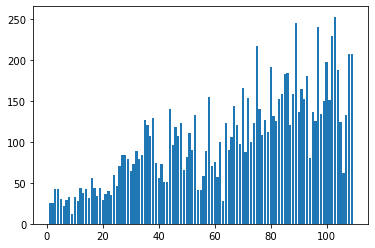

In [6]:
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 

plt.bar(height = wcat.AT, x = np.arange(1, 110, 1))
 


(array([14., 18., 16., 13., 17., 14.,  4.,  6.,  3.,  4.]),
 array([ 11.44 ,  35.596,  59.752,  83.908, 108.064, 132.22 , 156.376,
        180.532, 204.688, 228.844, 253.   ]),
 <a list of 10 Patch objects>)

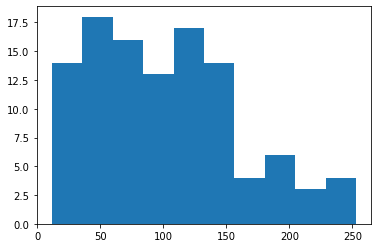

In [8]:
plt.hist(wcat.AT)

In [9]:
wcat['AT'].skew()

0.584869324127853

In [10]:
wcat['AT'].kurt()

-0.28557567504584425

{'whiskers': [<matplotlib.lines.Line2D at 0x238e5c647c0>,
 'caps': [<matplotlib.lines.Line2D at 0x238e5c9b970>,
 'boxes': [<matplotlib.lines.Line2D at 0x238e5c0d6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x238e5d53190>],
 'fliers': [<matplotlib.lines.Line2D at 0x238e5d50490>],
 'means': []}

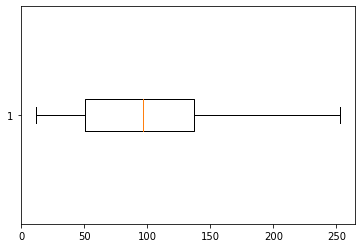

In [12]:
plt.boxplot(wcat.AT,vert=False)

(array([ 2.,  9., 19., 17., 11.,  9., 13., 21.,  5.,  3.]),
 array([ 63.5 ,  69.25,  75.  ,  80.75,  86.5 ,  92.25,  98.  , 103.75,
        109.5 , 115.25, 121.  ]),
 <a list of 10 Patch objects>)

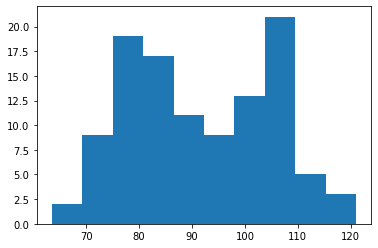

In [13]:
plt.hist(wcat.Waist)

In [15]:
wcat['Waist'].kurt()

-1.1026666011768886

In [16]:
wcat['Waist'].skew()

0.1340560824786468

{'whiskers': [<matplotlib.lines.Line2D at 0x238e6196f10>,
 'caps': [<matplotlib.lines.Line2D at 0x238e61a3610>,
 'boxes': [<matplotlib.lines.Line2D at 0x238e6196bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x238e61a3cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x238e61a3fd0>],
 'means': []}

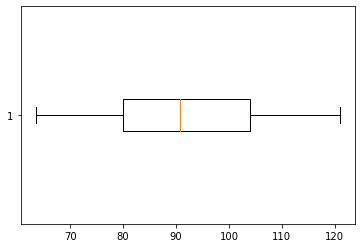

In [17]:
plt.boxplot(wcat.Waist,vert=False)

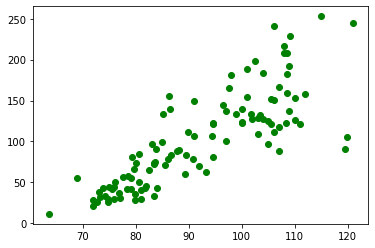

In [18]:
# Scatter plot
plt.scatter(x = wcat['Waist'], y = wcat['AT'], color = 'green') 


In [19]:
# correlation
np.corrcoef(wcat.Waist, wcat.AT) 



array([[1.        , 0.81855781],
       [0.81855781, 1.        ]])

In [20]:
# Covariance
# NumPy does not have a function to calculate the covariance between two variables directly. 
# Function for calculating a covariance matrix called cov() 
# By default, the cov() function will calculate the unbiased or sample covariance between the provided random variables.

cov_output = np.cov(wcat.Waist, wcat.AT)[0, 1]
cov_output

635.9100064135235

In [21]:
# Import library
import statsmodels.formula.api as smf

# Simple Linear Regression
model = smf.ols('AT ~ Waist', data = wcat).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           1.62e-27
Time:                        23:33:12   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
pred1 = model.predict(wcat['Waist'])

In [26]:
wcat['AT_Pred']=pred1

In [27]:
wcat.head()

,Waist,AT,AT_Pred
0,74.75,25.72,42.568252
1,72.60,25.89,35.131704
2,81.80,42.60,66.953210
3,83.95,42.80,74.389758
4,74.65,29.84,42.222366


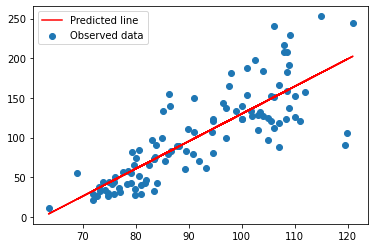

In [28]:
# Regression Line
plt.scatter(wcat.Waist, wcat.AT)
plt.plot(wcat.Waist, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()


In [30]:
res1 = wcat.AT - wcat.AT_Pred  #error
res_sqr1 = res1 * res1 # squared error
mse1 = np.mean(res_sqr1) # mean squared error
rmse1 = np.sqrt(mse1) #root mean squared error
rmse1

32.76017749575514

In [31]:
100-32.76017749575514

67.23982250424487

In [33]:
######### Model building on Transformed Data
model2 = smf.ols('AT ~ np.log(Waist)', data = wcat).fit()
model2.summary()
pred2 = model2.predict(pd.DataFrame(wcat['Waist']))

# Error calculation
res2 = wcat.AT - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2


32.49688490932126

In [34]:
#### Exponential transformation
# x = waist; y = log(at)

model3 = smf.ols('np.log(AT) ~ Waist', data = wcat).fit()
model3.summary()

pred3 = model3.predict(pd.DataFrame(wcat['Waist']))
pred3_at = np.exp(pred3)
pred3_at

# Error calculation
res3 = wcat.AT - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

38.52900175807143

In [35]:
#### Polynomial transformation
# x = waist; x^2 = waist*waist; y = log(at)

model4 = smf.ols('np.log(AT) ~ Waist + I(Waist*Waist)', data = wcat).fit()
model4.summary()

pred4 = model4.predict(pd.DataFrame(wcat))
pred4_at = np.exp(pred4)
pred4_at

# Error calculation
res4 = wcat.AT - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

32.24444782776227

In [38]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,32.760177
1,Log model,32.496885
2,Exp model,38.529002
3,Poly model,32.244448


##### As polynomial model  is having least RMSE value so its a best model

In [42]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(wcat, test_size = 0.2)

train.shape,test.shape



((87, 3), (22, 3))

In [43]:
#building and training our final model(polynomial) on train data
finalmodel = smf.ols('np.log(AT) ~ Waist + I(Waist*Waist)', data = train).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     134.9
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           5.93e-27
Time:                        00:05:39   Log-Likelihood:                -21.335
No. Observations:                  87   AIC:                             48.67
Df Residuals:                      84   BIC:                             56.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -6.5783      1.827     -3.601      0.001     -10.212      -2.945
Waist                0.2005      0.040      5.033      0.000       0.121       0.280
I(Waist * Waist)    -0.0009      0.000     -4.014      0.000      -0.001      -0.000
==============================================================================
Omnibus:                        0.264   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.198
Skew:                           0.114   Prob(JB):                        0.906
Kurtosis:                       2.946   Cond. No.                     4.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# Predict on test data
test_pred = finalmodel.predict(test)
pred_test_AT = np.exp(test_pred)
pred_test_AT

63     159.198626
12      32.877237
80     145.519044
101    160.980222
51      66.505351
11      37.797033
31      83.515845
8       14.782273
72     120.976352
36      95.651897
86     164.565594
74     158.490723
49      50.650269
13      49.677528
44      63.523347
64     168.259027
14      43.481043
3       67.071663
106    139.630807
55      48.397903
58      73.048133
54      47.765585
dtype: float64

In [48]:
# Model Evaluation on Test data
test_res = test.AT - pred_test_AT
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse


31.460536022200934

In [52]:
test_acc=100-test_rmse
print(test_acc)

68.53946397779907


In [53]:
# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_AT = np.exp(train_pred)
pred_train_AT

# Model Evaluation on train data

train_res = train.AT - pred_train_AT
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse

32.34600214683498

In [54]:
train_acc=100-32.34600214683498
print(train_acc)

67.65399785316502


In [55]:
print(test_acc)

68.53946397779907
